In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [6]:
energias=np.array([511,661.7,1173.2,1274.5,1332.5])
canales=np.array([1290.79,1661.56,2873.01,3132.70,3256.57])

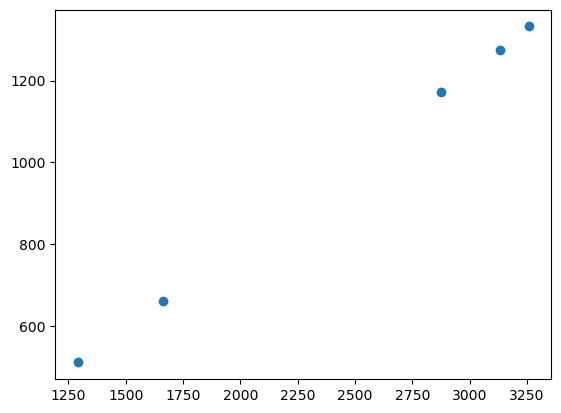

In [7]:
plt.scatter(canales,energias)

In [8]:
def f(x,a0,a1):
    return a1*x+a0




Text(0, 0.5, 'Energía')

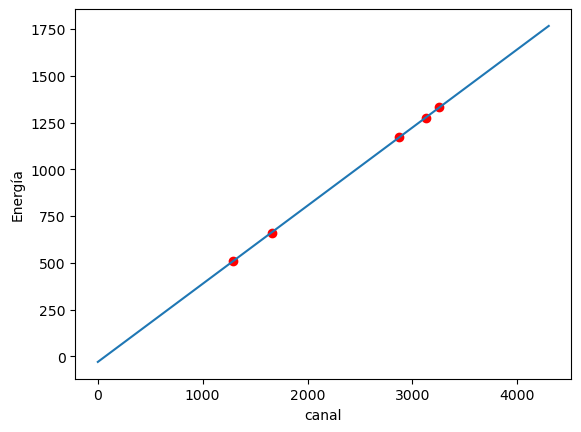

In [18]:
fit1=curve_fit(f,canales,energias)
fit1[0]
x=np.linspace(0,4300)
y=f(x,*fit1[0])
plt.plot(x,y)
plt.scatter(canales,energias,color="r")
plt.xlabel("canal")
plt.ylabel("Energía")

In [17]:
f(1290,*fit1[0])

508.9692101161413